In [14]:
import sys

import pickle
import json
import csv


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from prettytable import PrettyTable

LABEL_TO_ID = {'no_relation': 0, 'per:title': 1, 'org:top_members/employees': 2, 'per:employee_of': 3, 'org:alternate_names': 4, 'org:country_of_headquarters': 5, 'per:countries_of_residence': 6, 'org:city_of_headquarters': 7, 'per:cities_of_residence': 8, 'per:age': 9, 'per:stateorprovinces_of_residence': 10, 'per:origin': 11, 'org:subsidiaries': 12, 'org:parents': 13, 'per:spouse': 14, 'org:stateorprovince_of_headquarters': 15, 'per:children': 16, 'per:other_family': 17, 'per:alternate_names': 18, 'org:members': 19, 'per:siblings': 20, 'per:schools_attended': 21, 'per:parents': 22, 'per:date_of_death': 23, 'org:member_of': 24, 'org:founded_by': 25, 'org:website': 26, 'per:cause_of_death': 27, 'org:political/religious_affiliation': 28, 'org:founded': 29, 'per:city_of_death': 30, 'org:shareholders': 31, 'org:number_of_employees/members': 32, 'per:date_of_birth': 33, 'per:city_of_birth': 34, 'per:charges': 35, 'per:stateorprovince_of_death': 36, 'per:religion': 37, 'per:stateorprovince_of_birth': 38, 'per:country_of_birth': 39, 'org:dissolved': 40, 'per:country_of_death': 41}
ID_TO_LABEL = {val:key for key, val in LABEL_TO_ID.items()}
NO_RELATION = 'no_relation'

In [15]:
df1 = pickle.load(open('./result_tracker/train_detail.pkl', 'rb'))
df1 = pd.DataFrame(df1)
df1

,train_loss,dev_f1
0,1.228573,0.308203
1,0.916171,0.478739
2,0.749125,0.562859
3,0.641379,0.627998
4,0.562872,0.640561
5,0.501710,0.650665
6,0.452330,0.659508
7,0.411778,0.654864
8,0.378056,0.662559
9,0.349529,0.663573


In [16]:
df2 = pickle.load(open('./hl_result_tracker/train_detail.pkl', 'rb'))
df2 = pd.DataFrame(df2)
df2

,train_loss,dev_f1
0,8.596597,0.438928
1,6.320731,0.530097
2,5.237072,0.574475
3,4.563775,0.614529
4,4.092320,0.642802
5,3.739351,0.667626
6,3.452709,0.666974
7,3.214616,0.683547
8,3.010074,0.679871
9,2.831486,0.687163


In [17]:
df3 = pickle.load(open('./hl_norm_result_tracker/train_detail.pkl', 'rb'))
df3 = pd.DataFrame(df3)
df3

,train_loss,dev_f1,dev_precision,dev_recall
0,1.646519,0.422632,0.403924,0.443157
1,1.211843,0.446624,0.359052,0.590692
2,1.001173,0.539856,0.451641,0.670898
3,0.872975,0.607640,0.545242,0.686166
4,0.785992,0.620557,0.618066,0.623068
5,0.720610,0.650726,0.616983,0.688374
6,0.667834,0.657943,0.601493,0.726085
7,0.624774,0.648770,0.573446,0.746873
8,0.588379,0.647485,0.557519,0.772075
9,0.556585,0.669306,0.596744,0.761957


Text(0, 0.5, 'Dev F1')

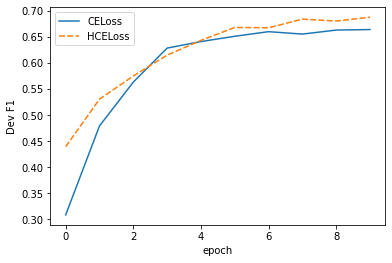

In [18]:
df_devf1 = pd.DataFrame({
    'CELoss': df1.dev_f1,
    'HCELoss': df2.dev_f1,
#     'NHCELoss': df3.dev_f1
})


sns.lineplot(data=df_devf1)
plt.xlabel("epoch")
plt.ylabel("Dev F1")

In [19]:
df_dev_recall = pd.DataFrame({
    'CELoss': df1.dev_recall,
    'HCELoss': df2.dev_recall,
#     'NHCELoss': df3.dev_recall
})


sns.lineplot(data=df_dev_recall)
plt.xlabel("epoch")
plt.ylabel("Dev Recall")

AttributeError: 'DataFrame' object has no attribute 'dev_recall'

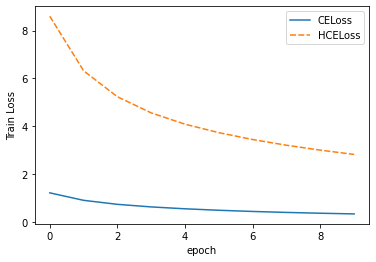

In [5]:
df_loss = pd.DataFrame({
    'CELoss': df1.train_loss,
    'HCELoss': df2.train_loss,
#     'NHCELoss': df3.train_loss
})


sns.lineplot(data=df_loss)
plt.xlabel("epoch")
plt.ylabel("Train Loss")

plt.savefig('./images/train_loss_10_epochs.png')

In [6]:
df1 = pickle.load(open('./result_tracker20/train_detail.pkl', 'rb'))
df1 = pd.DataFrame(df1)
df1

,train_loss,dev_f1,dev_precision,dev_recall
0,1.422872,0.016200,0.097959,0.008830
1,1.073368,0.450201,0.601724,0.359639
2,0.876567,0.541321,0.600403,0.492826
3,0.747452,0.607046,0.644421,0.573767
4,0.654120,0.622351,0.710408,0.553716
5,0.581534,0.655660,0.672928,0.639257
6,0.522634,0.669061,0.669987,0.668138
7,0.474142,0.664306,0.655908,0.672921
8,0.433413,0.663132,0.670617,0.655813
9,0.398729,0.666729,0.682598,0.651582


In [7]:
df2 = pickle.load(open('./hl_result_tracker20/train_detail.pkl', 'rb'))
df2 = pd.DataFrame(df2)
df2

,train_loss,dev_f1,dev_precision,dev_recall
0,9.803709,0.281335,0.249502,0.322480
1,7.545524,0.457323,0.475387,0.440581
2,6.230917,0.538112,0.532206,0.544150
3,5.397159,0.626822,0.584141,0.676233
4,4.813452,0.609193,0.670274,0.558315
5,4.377039,0.615652,0.558890,0.685247
6,4.030290,0.662660,0.676899,0.649007
7,3.744950,0.641703,0.574545,0.726637
8,3.497919,0.631694,0.623432,0.640177
9,3.280845,0.652616,0.667951,0.637969


In [9]:
df3 = pickle.load(open('./hl_norm_result_tracker20/train_detail.pkl', 'rb'))
df3 = pd.DataFrame(df3)
df3

,train_loss,dev_f1,dev_precision,dev_recall
0,1.879520,0.273895,0.304201,0.249080
1,1.437402,0.416002,0.341228,0.532745
2,1.179449,0.500987,0.438910,0.583517
3,1.017828,0.582187,0.546482,0.622884
4,0.908507,0.575256,0.705019,0.485835
5,0.827993,0.659089,0.667736,0.650662
6,0.764514,0.643541,0.606046,0.685982
7,0.713165,0.623332,0.528179,0.760302
8,0.669693,0.649713,0.573298,0.749632
9,0.631797,0.663421,0.610065,0.727005


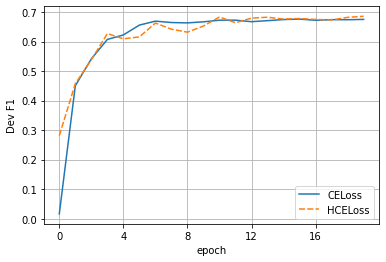

In [8]:
df_devf1_20 = pd.DataFrame({
    'CELoss': df1.dev_f1,
    'HCELoss': df2.dev_f1,
#     'NHCELoss': df3.dev_f1
})


sns.lineplot(data=df_devf1_20)
plt.xlabel("epoch")
plt.ylabel("Dev F1")
plt.grid()
ticks = range(0,20,4)
plt.xticks(ticks)
plt.savefig('./images/dev-f1-curve.png')

([<matplotlib.axis.XTick at 0x7f4aa69795c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

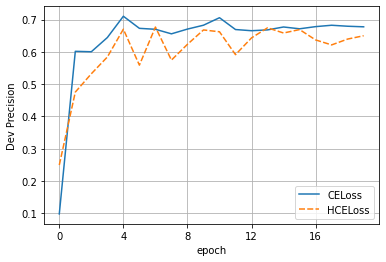

In [9]:
df_devp_20 = pd.DataFrame({
    'CELoss': df1.dev_precision,
    'HCELoss': df2.dev_precision,
#     'NHCELoss': df3.dev_precision
})


sns.lineplot(data=df_devp_20)
plt.xlabel("epoch")
plt.ylabel("Dev Precision")
plt.grid()
ticks = range(0,20,4)
plt.xticks(ticks)

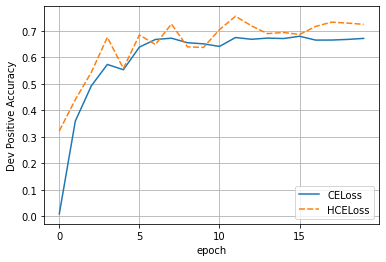

In [10]:
df_devr_20 = pd.DataFrame({
    'CELoss': df1.dev_recall,
    'HCELoss': df2.dev_recall,
#     'NHCELoss': df3.dev_recall
})


sns.lineplot(data=df_devr_20)
plt.xlabel("epoch")
plt.ylabel("Dev Positive Accuracy")
ticks = range(0,20,5)
plt.xticks(ticks)
plt.grid()
plt.savefig('./images/dev-pos-acc-curve.png')

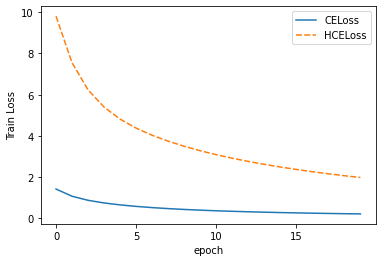

In [11]:
df_loss_20 = pd.DataFrame({
    'CELoss': df1.train_loss,
    'HCELoss': df2.train_loss,
#     'NHCELoss': df3.train_loss
})


sns.lineplot(data=df_loss_20)
plt.xlabel("epoch")
plt.ylabel("Train Loss")

ticks = range(0,20,5)
plt.xticks(ticks)
plt.savefig('./images/train_loss_20_epochs.png')

## Confusion Matrix Analysis

In [14]:
golds = []
with open('./../dataset/tacred/gold/test.gold') as inf:
    reader = csv.reader(inf)
    for line in reader:
        golds.append(line[0])
        
print(len(golds))

15509


In [15]:
def generate_per_relation_statistics(correct_by_relation, guessed_by_relation, gold_by_relation):
    print("#####Per-Relation Statistics:#####")
    relations = gold_by_relation.keys()
    longest_relation = 0
    for relation in sorted(relations):
        longest_relation = max(len(relation), longest_relation)
    for relation in sorted(relations):
        # (compute the score)
        correct = correct_by_relation[relation]
        guessed = guessed_by_relation[relation]
        gold    = gold_by_relation[relation]
        prec = 1.0
        if guessed > 0:
            prec = float(correct) / float(guessed)
        recall = 0.0
        if gold > 0:
            recall = float(correct) / float(gold)
        f1 = 0.0
        if prec + recall > 0:
            f1 = 2.0 * prec * recall / (prec + recall)
        # (print the score)
        sys.stdout.write(("{:<" + str(longest_relation) + "}").format(relation))
        sys.stdout.write("  P: ")
        if prec < 0.1: sys.stdout.write(' ')
        if prec < 1.0: sys.stdout.write(' ')
        sys.stdout.write("{:.2%}".format(prec))
        sys.stdout.write("  R: ")
        if recall < 0.1: sys.stdout.write(' ')
        if recall < 1.0: sys.stdout.write(' ')
        sys.stdout.write("{:.2%}".format(recall))
        sys.stdout.write("  F1: ")
        if f1 < 0.1: sys.stdout.write(' ')
        if f1 < 1.0: sys.stdout.write(' ')
        sys.stdout.write("{:.2%}".format(f1))
        sys.stdout.write("  #: %5d" % gold)
        sys.stdout.write("  c: %5d" % correct)
        sys.stdout.write("\n")
    print("")

In [16]:
def calculate_micro_prf1(correct_by_relation, guessed_by_relation, gold_by_relation):
    prec_micro = 1.0
    if sum(guessed_by_relation.values()) > 0:
        prec_micro   = float(sum(correct_by_relation.values())) / float(sum(guessed_by_relation.values()))
    recall_micro = 0.0
    if sum(gold_by_relation.values()) > 0:
        recall_micro = float(sum(correct_by_relation.values())) / float(sum(gold_by_relation.values()))
    f1_micro = 0.0
    if prec_micro + recall_micro > 0.0:
        f1_micro = 2.0 * prec_micro * recall_micro / (prec_micro + recall_micro)

    return prec_micro, recall_micro, f1_micro

In [23]:
def score(key, prediction, LABEL_TO_ID=LABEL_TO_ID, verbose=True):
    correct_by_relation = Counter()
    guessed_by_relation = Counter()
    gold_by_relation    = Counter()
    ID_TO_LABEL = {val:key for key, val in LABEL_TO_ID.items()}

    # To keep track of positive and negative accuracy
    no_rel = crct_no_rel = rel = crct_rel = 0

    #Confusion Matrix
    num_class = len(LABEL_TO_ID)
    print("Total number of relation labels :: {}".format(num_class))
    confusion_matrix = [[0 for x in range(num_class)] for y in range(num_class)]

    # Loop over the data to compute a score
    for row in range(len(key)):
        gold = key[row]
        guess = prediction[row]
        gold_id = LABEL_TO_ID[gold]
        guess_id = LABEL_TO_ID[guess]

        # Updating Confusion Matrix
        confusion_matrix[gold_id][guess_id] += 1
         
        if gold == NO_RELATION and guess == NO_RELATION:
            no_rel += 1
            crct_no_rel += 1
            pass
        elif gold == NO_RELATION and guess != NO_RELATION:
            no_rel += 1
            guessed_by_relation[guess] += 1
        elif gold != NO_RELATION and guess == NO_RELATION:
            rel += 1
            gold_by_relation[gold] += 1
        elif gold != NO_RELATION and guess != NO_RELATION:
            rel += 1
            guessed_by_relation[guess] += 1
            gold_by_relation[gold] += 1
            if gold == guess:
                crct_rel += 1
                correct_by_relation[guess] += 1

        
    # Print the aggregate score
    if verbose:
        print("Final Score:")
    prec_micro, recall_micro, f1_micro = calculate_micro_prf1(correct_by_relation, guessed_by_relation, gold_by_relation)
    print( "Precision (micro): {:.3%}".format(prec_micro) )
    print( "   Recall (micro): {:.3%}".format(recall_micro) )
    print( "       F1 (micro): {:.3%}".format(f1_micro) )
    
    # Print the Accuracy
    if no_rel != 0 and rel != 0:
        print(" Negative Accuracy : {} out of {}: {:.3%}".format(crct_no_rel, no_rel, (crct_no_rel / no_rel)))
        print(" Positive Accuracy : {} out of {}: {:.3%}".format(crct_rel, rel, (crct_rel / rel)))
        print(" Overall Accuracy : {} out of {}: {:.3%}".format((crct_rel+crct_no_rel), (rel+no_rel), 
                                                                    ((crct_rel+crct_no_rel) / (rel+no_rel))))

    # Printing Confusion Matrix
    cnt = 0
    for row in confusion_matrix:
        row.insert(0, ID_TO_LABEL[cnt])
        cnt += 1
    generate_per_relation_statistics(correct_by_relation, guessed_by_relation, gold_by_relation)
    
    return confusion_matrix

In [19]:
def generate_confusion_matrix(cm):
    df = pd.DataFrame(cm)
    df = df.set_index(0)
    df.index.name = 'labels'
    df = df.rename(columns={i:ID_TO_LABEL[i-1] for i in range(1,43)})
    df = df.div(df.sum(axis=1), axis=0).round(3) * 100
    plt.figure(figsize=(25,15))
    sns.heatmap(df, cmap='BuPu', annot=True, fmt='g')

In [28]:
def generate_diff_confusion_matrix(cm1, cm2):
    df1 = pd.DataFrame(cm1)
    df1 = df1.set_index(0)
    df1.index.name = 'labels'
    df1 = df1.rename(columns={i:ID_TO_LABEL[i-1] for i in range(1,43)})
    df1 = df1.div(df1.sum(axis=1), axis=0).round(3) * 100

    df2 = pd.DataFrame(cm2)
    df2 = df2.set_index(0)
    df2.index.name = 'labels'
    df2 = df2.rename(columns={i:ID_TO_LABEL[i-1] for i in range(1,43)})
    df2 = df2.div(df2.sum(axis=1), axis=0).round(3) * 100

    df = df2 - df1
    plt.figure(figsize=(25,15))
    sns.heatmap(df, cmap='BrBG', annot=True, fmt='g')

In [21]:
preds = []
with open('./spanbert-original/predictions.txt') as inf:
    reader = csv.reader(inf, delimiter='\t')
    for line in reader:
        preds.append(line[1])
        
print(len(preds))

15509


Total number of relation labels :: 42
Final Score:
Precision (micro): 67.936%
   Recall (micro): 62.767%
       F1 (micro): 65.249%
 Negative Accuracy : 11390 out of 12184: 93.483%
 Positive Accuracy : 2087 out of 3325: 62.767%
 Overall Accuracy : 13477 out of 15509: 86.898%
#####Per-Relation Statistics:#####
org:alternate_names                  P:  72.61%  R:  82.16%  F1:  77.09%  #:   213  c:   175
org:city_of_headquarters             P:  76.32%  R:  70.73%  F1:  73.42%  #:    82  c:    58
org:country_of_headquarters          P:  55.21%  R:  49.07%  F1:  51.96%  #:   108  c:    53
org:dissolved                        P: 100.00%  R:   0.00%  F1:   0.00%  #:     2  c:     0
org:founded                          P:  76.92%  R:  81.08%  F1:  78.95%  #:    37  c:    30
org:founded_by                       P:  73.85%  R:  70.59%  F1:  72.18%  #:    68  c:    48
org:member_of                        P: 100.00%  R:   0.00%  F1:   0.00%  #:    18  c:     0
org:members                          P

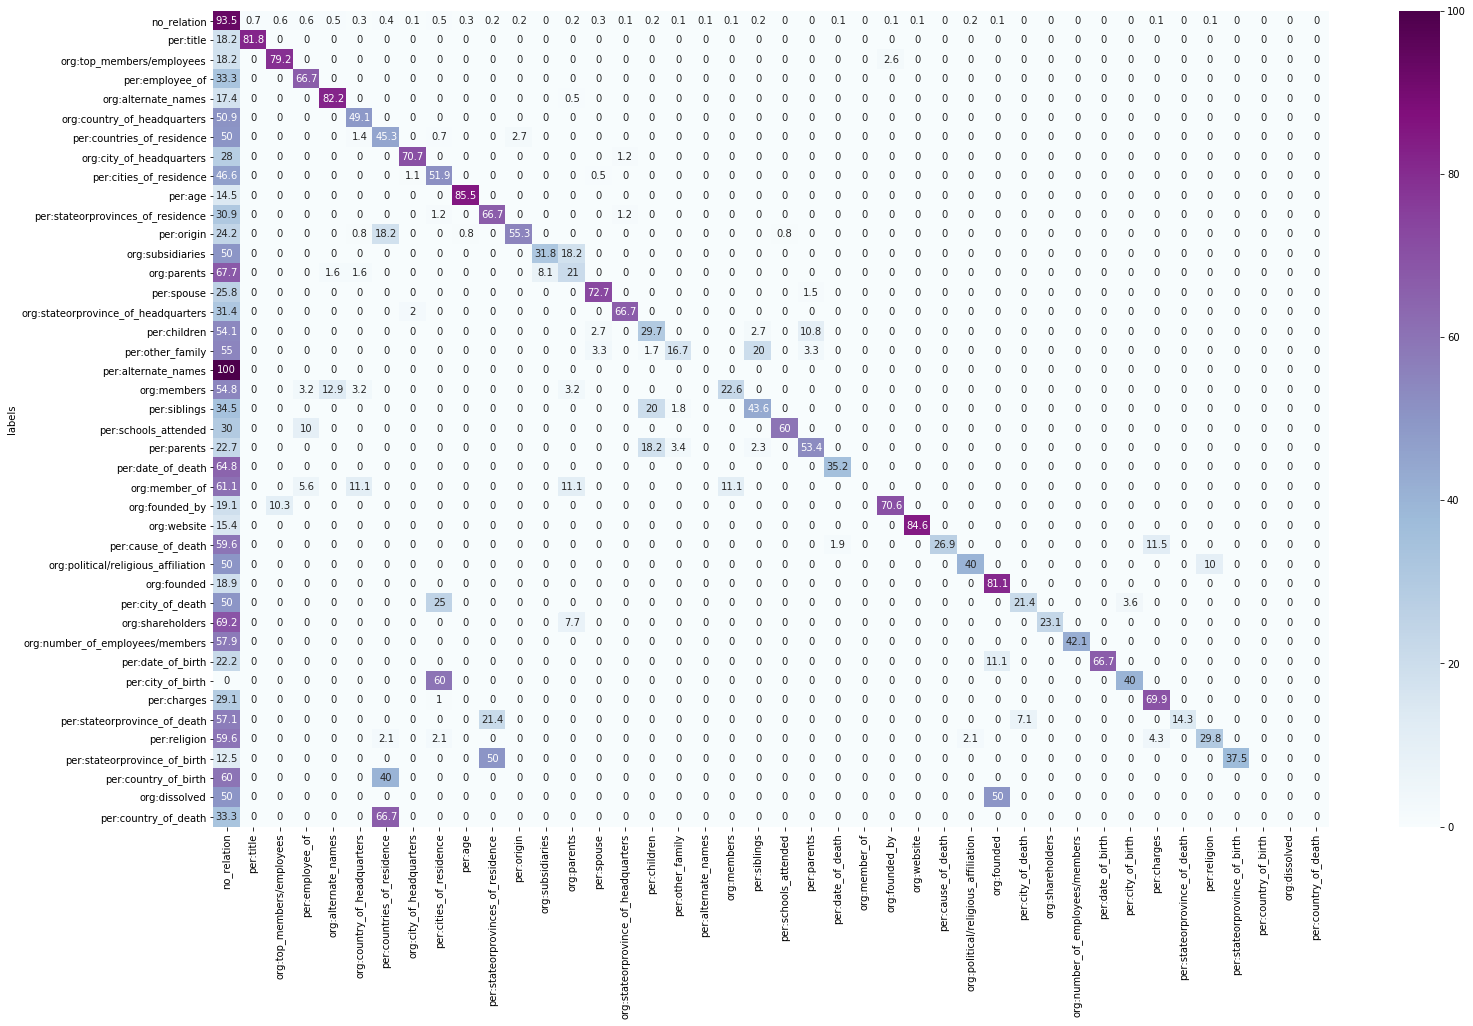

In [24]:
cm = score(golds, preds)
df = pd.DataFrame(cm)
generate_confusion_matrix(cm)

In [25]:
hl_preds = []
with open('./spanbert-hl/predictions.txt') as inf:
    reader = csv.reader(inf, delimiter='\t')
    for line in reader:
        hl_preds.append(line[1])

print(len(hl_preds))

15509


Total number of relation labels :: 42
Final Score:
Precision (micro): 68.881%
   Recall (micro): 69.233%
       F1 (micro): 69.057%
 Negative Accuracy : 11290 out of 12184: 92.663%
 Positive Accuracy : 2302 out of 3325: 69.233%
 Overall Accuracy : 13592 out of 15509: 87.639%
#####Per-Relation Statistics:#####
org:alternate_names                  P:  72.31%  R:  82.16%  F1:  76.92%  #:   213  c:   175
org:city_of_headquarters             P:  75.29%  R:  78.05%  F1:  76.65%  #:    82  c:    64
org:country_of_headquarters          P:  59.26%  R:  44.44%  F1:  50.79%  #:   108  c:    48
org:dissolved                        P: 100.00%  R:   0.00%  F1:   0.00%  #:     2  c:     0
org:founded                          P:  82.50%  R:  89.19%  F1:  85.71%  #:    37  c:    33
org:founded_by                       P:  67.14%  R:  69.12%  F1:  68.12%  #:    68  c:    47
org:member_of                        P: 100.00%  R:   0.00%  F1:   0.00%  #:    18  c:     0
org:members                          P

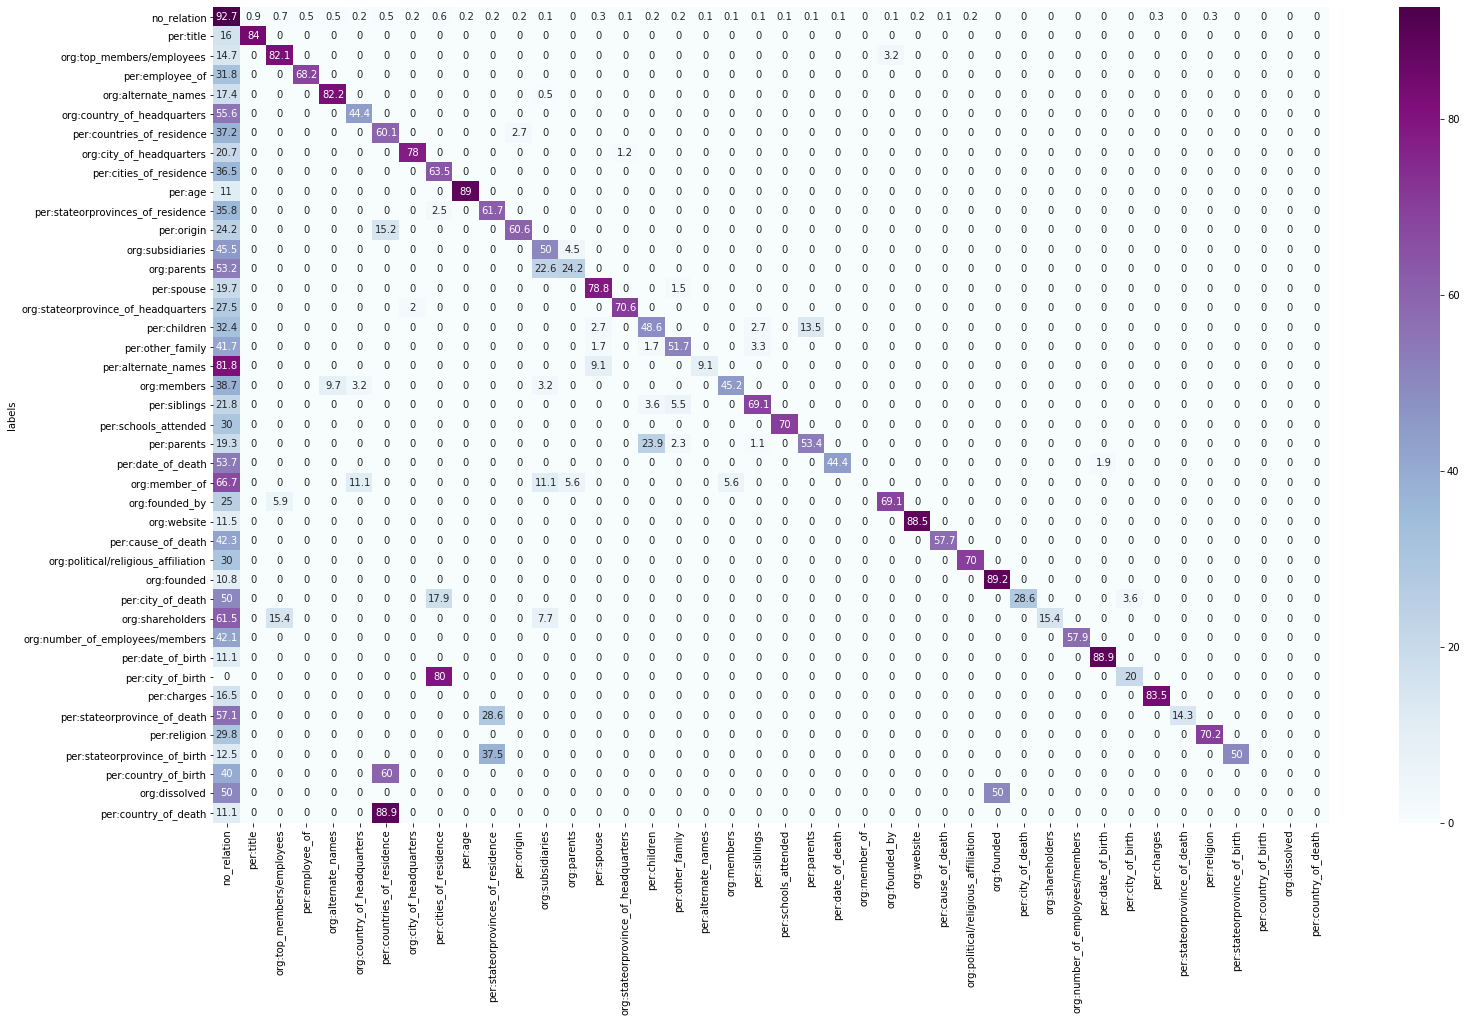

In [26]:
cm_hl = score(golds, hl_preds)
df_hl = pd.DataFrame(cm_hl)
generate_confusion_matrix(cm_hl)

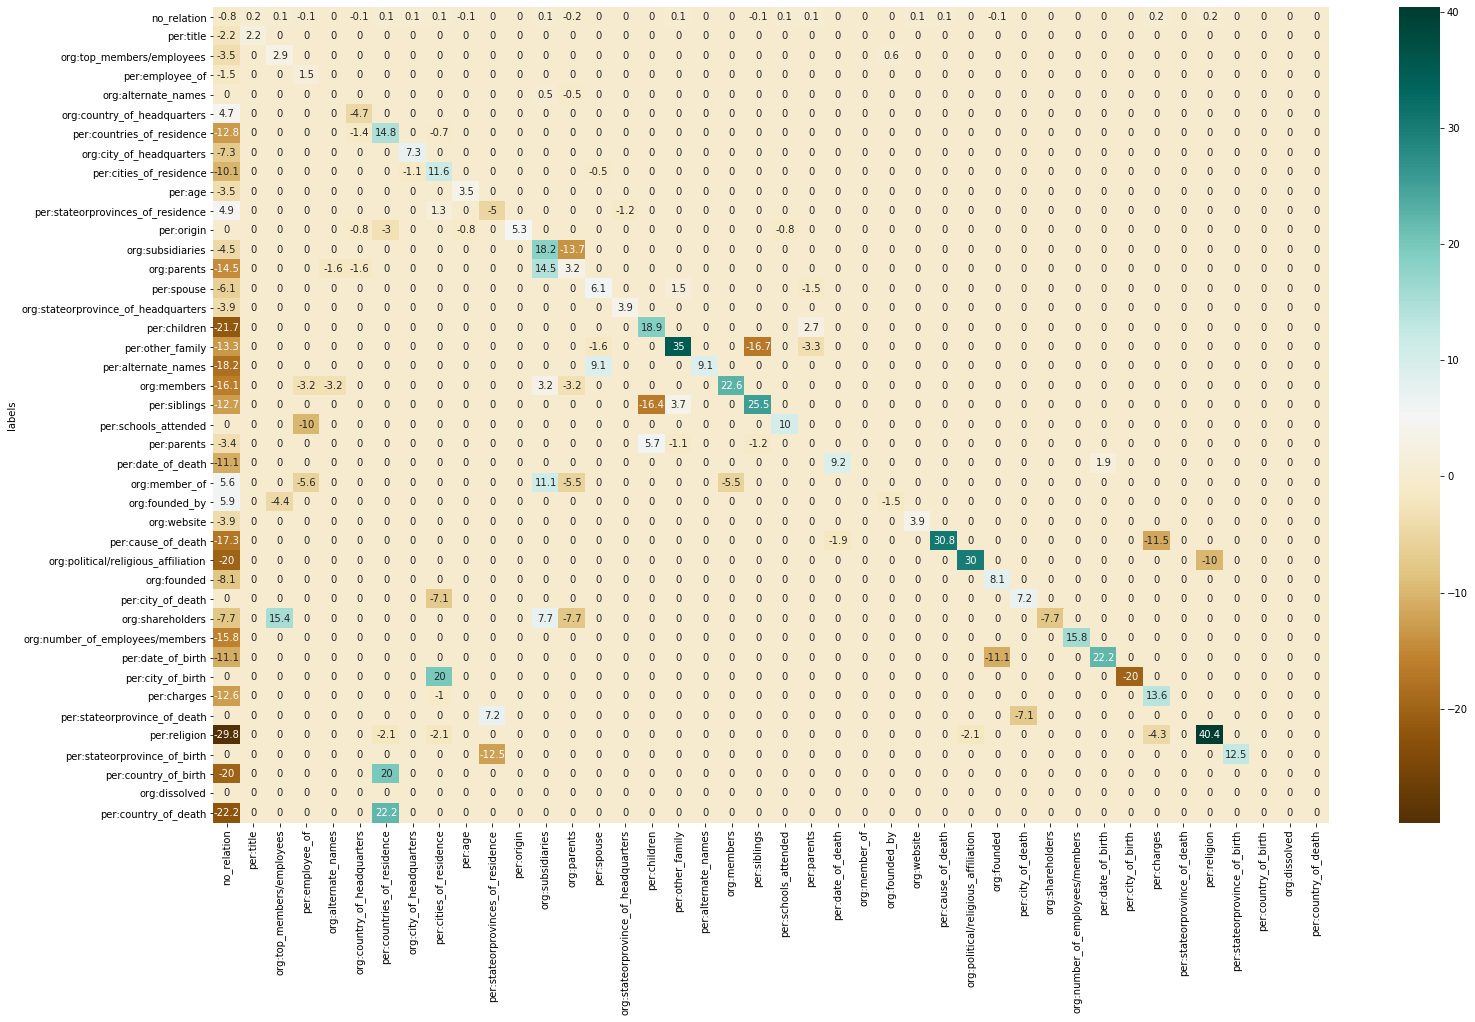

In [29]:
generate_diff_confusion_matrix(cm, cm_hl)

In [30]:
nhl_preds = []
with open('./spanbert_hl_norm/predictions.txt') as inf:
    reader = csv.reader(inf, delimiter='\t')
    for line in reader:
        nhl_preds.append(line[1])

print(len(nhl_preds))

15509


Total number of relation labels :: 42
Final Score:
Precision (micro): 63.294%
   Recall (micro): 70.165%
       F1 (micro): 66.553%
 Negative Accuracy : 11022 out of 12184: 90.463%
 Positive Accuracy : 2333 out of 3325: 70.165%
 Overall Accuracy : 13355 out of 15509: 86.111%
#####Per-Relation Statistics:#####
org:alternate_names                  P:  71.77%  R:  83.57%  F1:  77.22%  #:   213  c:   178
org:city_of_headquarters             P:  67.00%  R:  81.71%  F1:  73.63%  #:    82  c:    67
org:country_of_headquarters          P:  56.82%  R:  46.30%  F1:  51.02%  #:   108  c:    50
org:dissolved                        P: 100.00%  R:   0.00%  F1:   0.00%  #:     2  c:     0
org:founded                          P:  71.74%  R:  89.19%  F1:  79.52%  #:    37  c:    33
org:founded_by                       P:  67.07%  R:  80.88%  F1:  73.33%  #:    68  c:    55
org:member_of                        P: 100.00%  R:   0.00%  F1:   0.00%  #:    18  c:     0
org:members                          P

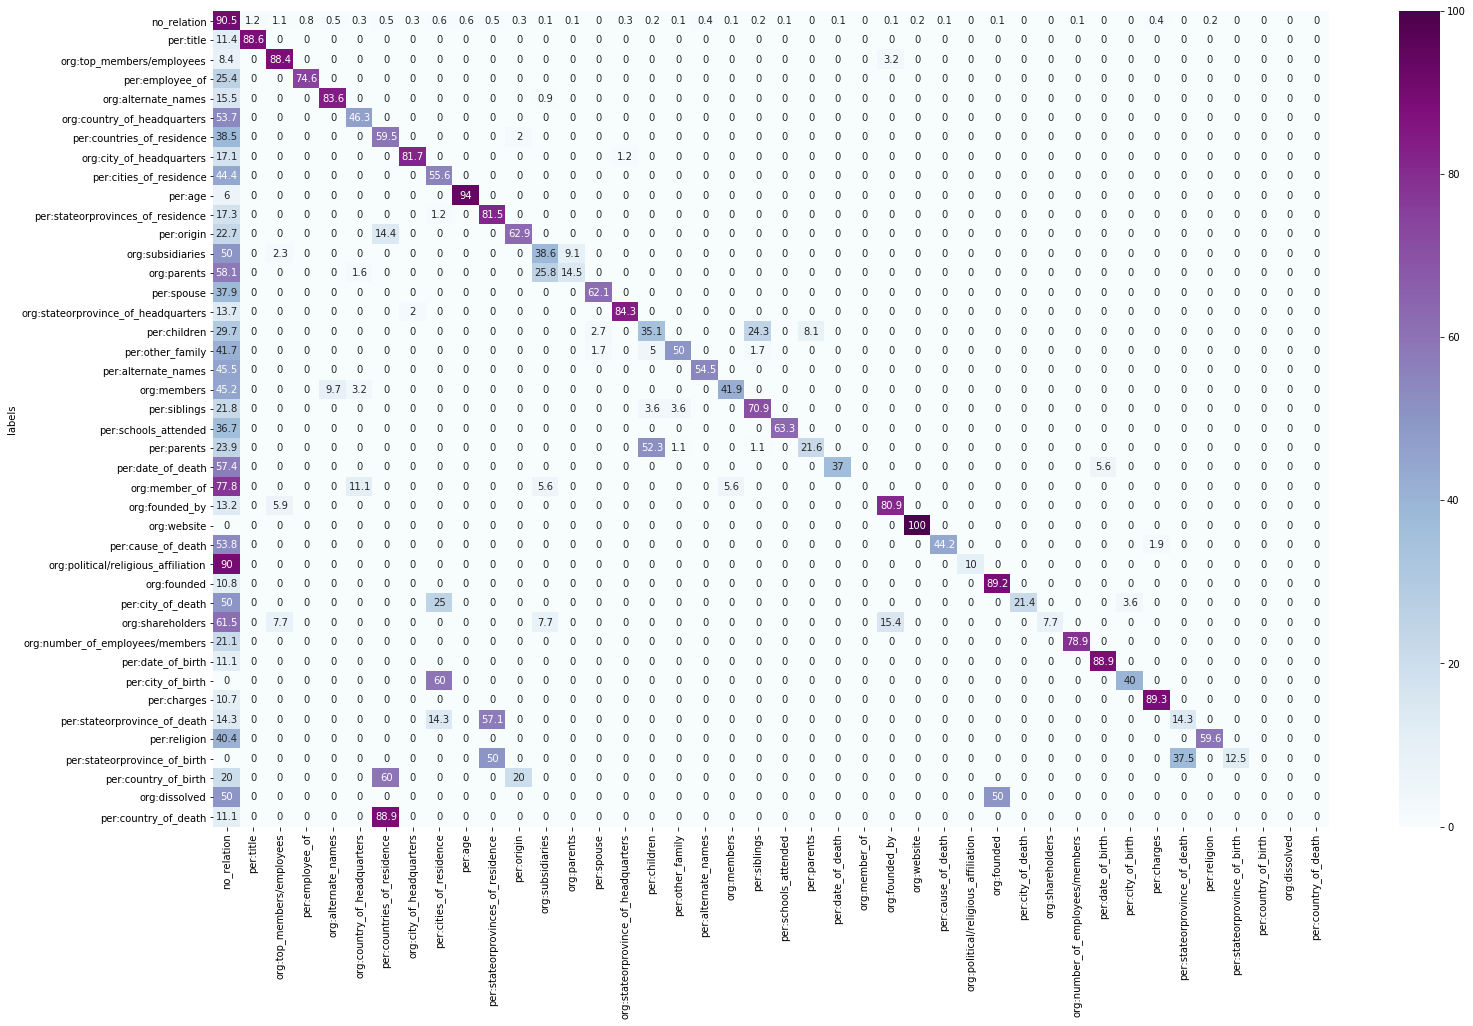

In [31]:
cm_nhl = score(golds, nhl_preds)
df_nhl = pd.DataFrame(cm_nhl)
generate_confusion_matrix(cm_nhl)

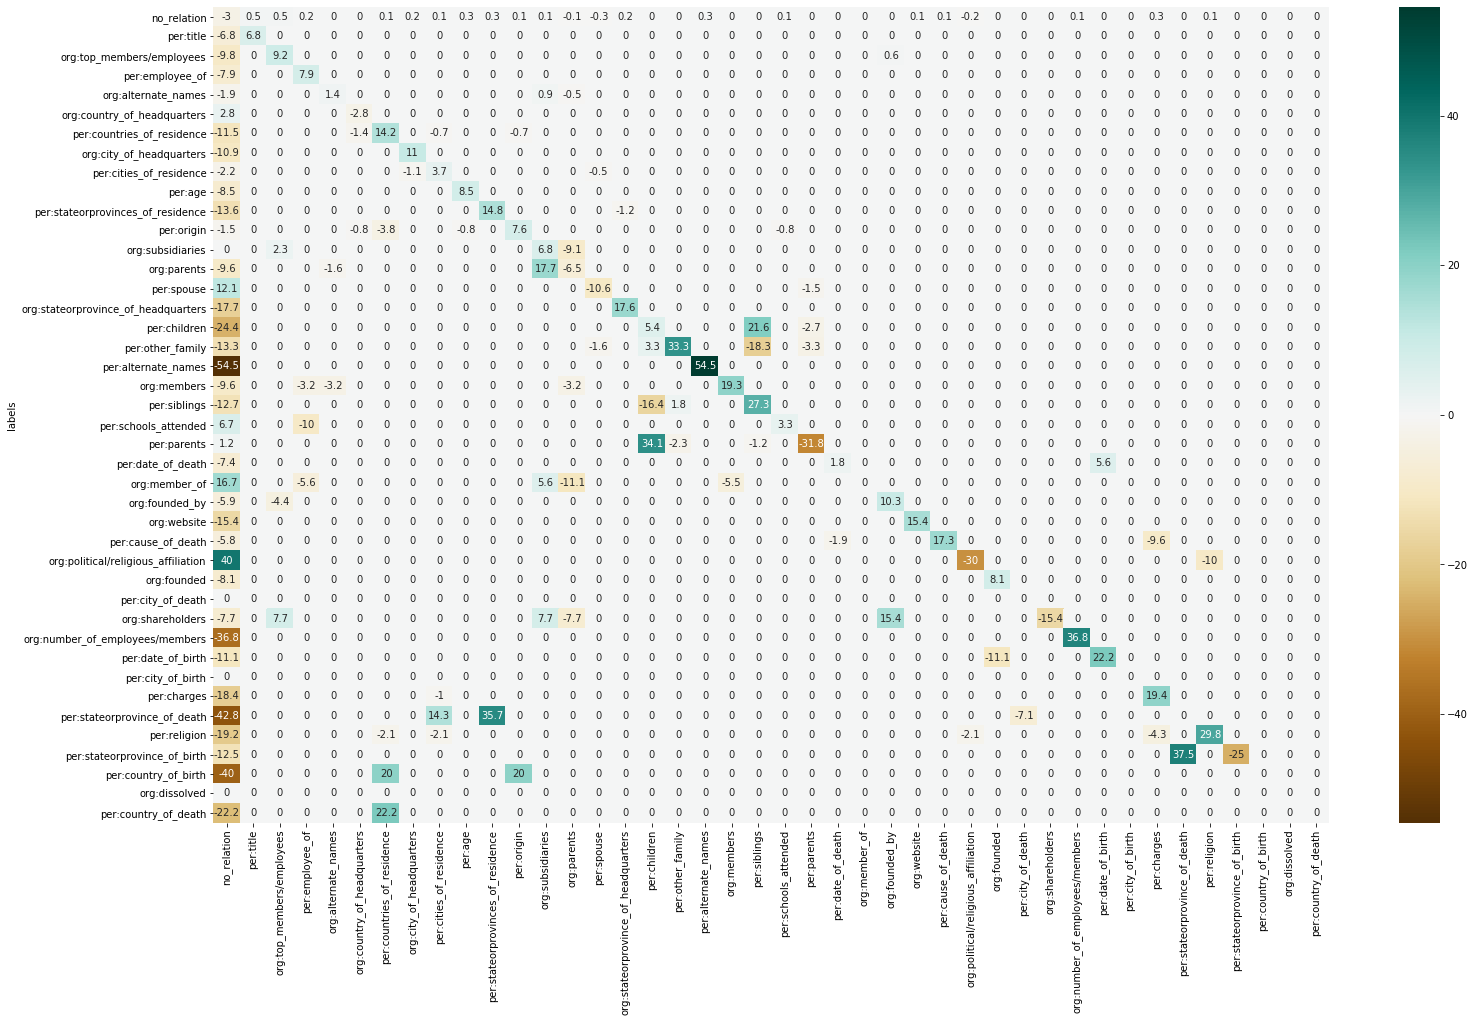

In [32]:
generate_diff_confusion_matrix(cm, cm_nhl)

## Label Prediction Analysis

In [33]:
preds = []
with open('./spanbert-original/predictions.txt') as inf:
    reader = csv.reader(inf, delimiter='\t')
    for line in reader:
        preds.append(line[1])
        
print(len(preds))

cm = score(golds, preds)

15509
Total number of relation labels :: 42
Final Score:
Precision (micro): 67.936%
   Recall (micro): 62.767%
       F1 (micro): 65.249%
 Negative Accuracy : 11390 out of 12184: 93.483%
 Positive Accuracy : 2087 out of 3325: 62.767%
 Overall Accuracy : 13477 out of 15509: 86.898%
#####Per-Relation Statistics:#####
org:alternate_names                  P:  72.61%  R:  82.16%  F1:  77.09%  #:   213  c:   175
org:city_of_headquarters             P:  76.32%  R:  70.73%  F1:  73.42%  #:    82  c:    58
org:country_of_headquarters          P:  55.21%  R:  49.07%  F1:  51.96%  #:   108  c:    53
org:dissolved                        P: 100.00%  R:   0.00%  F1:   0.00%  #:     2  c:     0
org:founded                          P:  76.92%  R:  81.08%  F1:  78.95%  #:    37  c:    30
org:founded_by                       P:  73.85%  R:  70.59%  F1:  72.18%  #:    68  c:    48
org:member_of                        P: 100.00%  R:   0.00%  F1:   0.00%  #:    18  c:     0
org:members                     

In [38]:
RELABELED_LABEL_TO_ID = {'no_relation': 0, 'per:title': 1, 'org:top_members/employees': 2, 'per:employee_of': 3, 'org:alternate_names': 4, 
            'org:location_of_headquarters': 5, 'per:locations_of_residence': 6, 'per:age': 7, 'per:origin': 8, 'org:subsidiaries': 9,
            'org:parents': 10, 'per:family': 11, 'per:alternate_names': 12, 'org:members': 13, 'per:schools_attended': 14, 
            'per:date_of_death': 15, 'org:member_of': 16, 'org:founded_by': 17, 'org:website': 18, 'per:cause_of_death': 19, 
            'org:political/religious_affiliation': 20, 'org:founded': 21, 'per:location_of_death': 22, 'org:shareholders': 23, 
            'org:number_of_employees/members': 24, 'per:date_of_birth': 25, 'per:location_of_birth': 26, 'per:charges': 27, 
            'per:religion': 28, 'org:dissolved': 29}

PARENTS = {'org:city_of_headquarters': 'org:location_of_headquarters',
          'org:country_of_headquarters': 'org:location_of_headquarters',
          'org:stateorprovince_of_headquarters': 'org:location_of_headquarters',
          'per:city_of_birth': 'per:location_of_birth',
          'per:country_of_birth': 'per:location_of_birth',
          'per:stateorprovince_of_birth': 'per:location_of_birth',
          'per:city_of_death': 'per:location_of_death',
          'per:country_of_death': 'per:location_of_death',
          'per:stateorprovince_of_death': 'per:location_of_death',
          'per:cities_of_residence' : 'per:locations_of_residence',  
          'per:countries_of_residence' : 'per:locations_of_residence',
          'per:stateorprovinces_of_residence' : 'per:locations_of_residence',
          'per:children' : 'per:family',
          'per:other_family' : 'per:family',
          'per:parents' : 'per:family',
          'per:siblings' : 'per:family',
          'per:spouse' : 'per:family'}

golds = [PARENTS[rel] if rel in PARENTS.keys() else rel for rel in golds]
preds = []

with open('./spanbert-filt-re/predictions.txt') as inf:
    reader = csv.reader(inf, delimiter='\t')
    for line in reader:
        preds.append(line[1])
        
print(len(preds))

cm = score(golds, preds, LABEL_TO_ID=RELABELED_LABEL_TO_ID)

15509
Total number of relation labels :: 30
Final Score:
Precision (micro): 70.671%
   Recall (micro): 65.293%
       F1 (micro): 67.876%
 Negative Accuracy : 11411 out of 12184: 93.656%
 Positive Accuracy : 2171 out of 3325: 65.293%
 Overall Accuracy : 13582 out of 15509: 87.575%
#####Per-Relation Statistics:#####
org:alternate_names                  P:  74.49%  R:  84.98%  F1:  79.39%  #:   213  c:   181
org:dissolved                        P: 100.00%  R:   0.00%  F1:   0.00%  #:     2  c:     0
org:founded                          P:  81.58%  R:  83.78%  F1:  82.67%  #:    37  c:    31
org:founded_by                       P:  70.00%  R:  72.06%  F1:  71.01%  #:    68  c:    49
org:location_of_headquarters         P:  74.18%  R:  56.02%  F1:  63.83%  #:   241  c:   135
org:member_of                        P: 100.00%  R:   0.00%  F1:   0.00%  #:    18  c:     0
org:members                          P:   0.00%  R:   0.00%  F1:   0.00%  #:    31  c:     0
org:number_of_employees/members 